<a href="https://colab.research.google.com/github/Imperial-College-Data-Science-Society/Lecture-series-2022-23/blob/main/Numpy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Numpy**

Numpy is used for working with multi-dimensional arrays. Numpy uses "vectorisation" to make calculation much quicker and efficient.

In [1]:
#Importing Numpy
import numpy as np

Creating numpy arrays

In [2]:
arr = np.array([1,2,3,4,5])

In [3]:
arr

array([1, 2, 3, 4, 5])

Numpy has built in methods to initalise specific arrays with evenly spaced numbers over some given interval: 

*   **np.arange([start,] stop, [step, ])**: if start and step are not specified, they are assumed to be 0 and 1 respectively
*   **np.linspace(start, stop, num)**



In [4]:
arr = np.arange(5) #array[0,1,2,3,4]
arr = np.arange(10,15) #array [10,11,12,13,14]
arr = np.arange(0,10,2) #array[0,2,4,6,8]

**Creating Vectors and Matrices**

In [5]:
vector = np.zeros(4) #R4 Zero Vector
matrix = np.zeros([2,4]) #R2x4 Zero Matrix.
tensor = np.zeros([4,3,2]) #R4x3x2 tensor

In [6]:
tensor[1][2][1]

0.0

In [7]:
#The input must be in a list (unless it is a Vector) 
arr = np.zeros(2,4) #This will return an error!

TypeError: ignored

**Creating arrays with random numbers**

*   **np.random.rand(d0,d1,...,dn)**
*  **np.random.randn(d0,d1,...,dn)**
Both create an array of the given shape and populate with random samples

Rand: Unifrom Distribution over interval [0,1)

Randn: Standard Normal Distribution
Standard Normal Dist.svg
Credits: https://www.w3schools.com/statistics/statistics_standard_normal_distribution.php



In [8]:
arr = np.random.rand(3,4)

In [9]:
arr

array([[0.47891737, 0.10867652, 0.63825805, 0.73877249],
       [0.5412272 , 0.81185954, 0.62997333, 0.40857586],
       [0.98699085, 0.57064049, 0.74732305, 0.90619261]])

In [10]:
arr = np.random.randn(3,4)

In [11]:
arr

array([[-0.14143392,  1.75296286,  0.83545628,  0.18854655],
       [-0.93879747, -0.55131562, -2.41949708,  0.76742418],
       [ 0.52203868,  0.65269839, -0.30020753,  1.64518606]])

Other Methods: 

*   **np.identity(n)**: R nxn Identity Matrix
*   **np.eye(N)**: R NxN Diagonal Matrix



**Reshaping Arrays**

In [12]:
arr.shape

(3, 4)

In [13]:
arr.reshape((4,3))

array([[-0.14143392,  1.75296286,  0.83545628],
       [ 0.18854655, -0.93879747, -0.55131562],
       [-2.41949708,  0.76742418,  0.52203868],
       [ 0.65269839, -0.30020753,  1.64518606]])

When reshaping, numpy allows 1 dimension to be "-1." This means that it is an unknown dimension and lets numpy figure it out on its own. For example with a R3x4 matrix:

In [14]:
arr.reshape((3,-1))
#Numpy Automatically figured out that the -1 should be a 4. 
#As there are 12 elements but 3 was already specified

array([[-0.14143392,  1.75296286,  0.83545628,  0.18854655],
       [-0.93879747, -0.55131562, -2.41949708,  0.76742418],
       [ 0.52203868,  0.65269839, -0.30020753,  1.64518606]])

**Slicing**

In [15]:
arr = np.arange(15) #[0,1,2,3,...,13,14]

In [16]:
#Reshape into a 3x5 matrix 
arr = arr.reshape((3,-1))

In [17]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [18]:
arr[0,:] #Get row 0
arr[:,0:2] #Get all rows in columns 0 to 1 (2 is exclusive)

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

**Boolean Indexing**

In [19]:
arr>5

array([[False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [20]:
arr[arr>5] #Return elements that satisfy the condition

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14])

**Matrix & Element-wise Multiplication**

In [21]:
arr = np.arange(4).reshape((2,2))
arr

array([[0, 1],
       [2, 3]])

In [22]:
arr*arr #Multiplies corresponding elements

array([[0, 1],
       [4, 9]])

In [23]:
np.dot(arr,arr) #Matrix Multiplication

array([[ 2,  3],
       [ 6, 11]])

**Broadcasting**
<br> "Subject to certain constraints, the smaller array is "broadcast" across the larger array so that they have compatible shapes"

<br> Say we want a new array with elements that are double the original array. For example: [1, 2, 3, 4] --> [2, 4, 6, 8]

In [ ]:
[1,2,3,4] * 2

In [ ]:
[1,2,3,4] * [2,2,2,2] #This will return an error

2 valid ways to double each element in a list (without NumPy) are:



In [ ]:
[2*x for x in [1,2,3,4]] #Method 1: List Comprehension

In [ ]:
list(map(lambda x:x*2,[1,2,3,4])) #Method 2: map and lambda.......

Why go through all this trouble when you have NumPy broadcasting?

In [ ]:
np.array([1,2,3,4]) * 2 #NumPy "stretched" 2 to match the dimension of the array.

More examples in Broadcasting: The [[2],[3]] is "broadcast" into [[2,2,2,2],[3,3,3,3]]

In [ ]:
np.array([[1,2,3,4],[5,6,7,8]]) * [[2],[3]] #Multiply first row by 2 and second row by 3

Instead of manually creating a new array/ list: [2, 2, 2, 2], numpy automatically "broadcast" the number 2 to be a numpy array with the appropriate shape.

**How efficient is numpy?**

Demonstration with matrix multiplication. For loop vs numpy (with timing)

In [ ]:
import time #Package for timing

In [ ]:
def matmul(matrix1_,matrix2_):
  """Function that returns matrix multiplication result using for loop method"""
  result = [] # final result
  for i in range(len(matrix1_)):
    row = [] # the new row in new matrix

    for j in range(len(matrix2_[0])):

      product = 0 # the new element in the new row

      for v in range(len(matrix1_[i])):
        product += matrix1_[i][v] * matrix2_[v][j]
        row.append(product) # append sum of product into the new row

      result.append(row) # append the new row into the final result
  return result

In [ ]:
#Initialising arrays for multiplication
np.random.seed(42)
arr1 = np.random.randn(300,300)
arr2 = np.random.randn(300,50)

#Using for loops
start_for = time.perf_counter()
result_for = matmul(arr1,arr2)
end_for = time.perf_counter()
print(f'For loop took: {end_for-start_for:.5f} seconds')

#Using Numpy
start_np = time.perf_counter()
result_np = np.dot(arr1,arr2)
end_np = time.perf_counter()
print(f'Numpy took: {end_np-start_np:.5f} seconds')

**Introduction to Pandas**

In [ ]:
import pandas as pd

<br> Pandas is bulit on top of the NUMPY package. Hence many Numpy methods will be valid in pandas


<br> Pandas mainly used for working with data sets. Many built in functions help with preprocessing data for further use.The next lecture is about preprocessing data using real data!

*Core Components of Pandas*
<br> There are 2 main components of pandas: Series and DataFrame.

<br> Series are essentially numpy arrays (or is essentially a column in a table) while DataFrames are a collection of series.

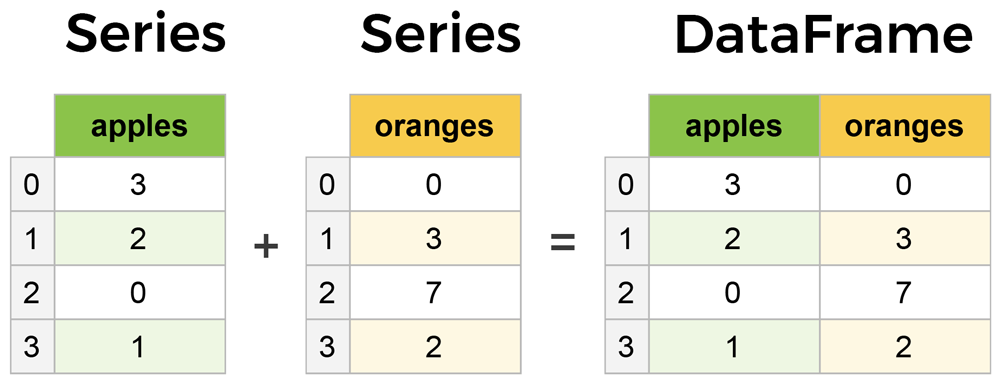
Credits: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

For datascience, most data will be in a CSV/ excel format. Pandas has a built in function for this

In [ ]:
#This file is already available in COLAB
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head() #Print the first 5 rows

Note that each series must have elements of the same data type but not all series in a dataframe must have the same data type. For example, 1 column can be floats only while another consists of strings

In [ ]:
df.describe() #Get statistics for each column

In [ ]:
df['longitude'] #Display the "longitude" column of the dataframe. Returns a series

In [ ]:
df[['longitude','latitude']] #Display multiple columns. Returns a dataframe

**Boolean Indexing**
<br> Just like a numpy array, conditions can be used to slice a dataframe.

In [ ]:
df['housing_median_age'] >37

In [ ]:
df[df['housing_median_age']>37] #Returns all columns that satisfy the condition